# Задания

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import pearsonr, spearmanr

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [21]:
with open('../datasets/pizza.csv', 'r') as f:
    next(f)
    df = pd.DataFrame([l.rstrip().split(';') for l in f],
                      columns=['order_details_id', 'order_id', 'pizza_id', 'order_date', 'order_time', 'unit_price',
                               'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'lead_time'])
df.head(3)

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19


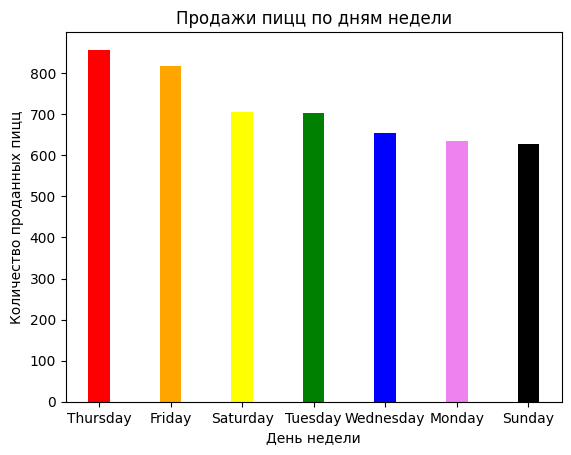

День с наибольшим количеством проданных пицц: ('Thursday', 857)
День с наименьшим количеством проданных пицц: ('Sunday', 628)


In [22]:
# Преобразование столбца 'order_date' в тип даты
df['order_date'] = pd.to_datetime(df['order_date'])

# Добавление столбца 'day_of_week' с названиями дней недели
df['day_of_week'] = df['order_date'].dt.day_name()

# Подсчет количества проданных пицц для каждого дня недели
pizza_counts = df['day_of_week'].value_counts()

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'black']
kwargs = {'width': 0.3, 'color': colors }

# Построение диаграммы
plt.bar(pizza_counts.index, pizza_counts.values,  **kwargs )
plt.xlabel('День недели')
plt.ylabel('Количество проданных пицц')
plt.title('Продажи пицц по дням недели')
plt.show()

print(f"День с наибольшим количеством проданных пицц: {pizza_counts.idxmax(),pizza_counts [0]}")
print(f"День с наименьшим количеством проданных пицц: {pizza_counts.idxmin(),pizza_counts [-1]}")

### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [23]:
df['order_time'] = pd.to_datetime(df['order_time'])

df['lead_time'] = pd.to_datetime(df['lead_time'])
# с помощью pd.to_timedelta() строковые значения преобразуются в тип timedelta.
df['order_time'] = df['order_date'] + pd.to_timedelta(df['order_time'].dt.strftime('%H:%M:%S'))
# dt.total_seconds() преобразует timedelta в количество секунд. Результат сохраняется в столбце 'cook_time'.
df['cook_time'] = (df['lead_time'] - df['order_time']).dt.total_seconds()

cook_time_mean = round(df['cook_time'].mean())
cook_time_median = round(df['cook_time'].median())
cook_time_max = round(df['cook_time'].max())
cook_time_min = round(df['cook_time'].min())

print(f"Среднее время приготовления пиццы: {cook_time_mean} сек")
print(f"Медианное время приготовления пиццы: {cook_time_median} сек")
print(f"Максимальное время приготовления пиццы: {cook_time_max} сек")
print(f"Минимальное время приготовления пиццы: {cook_time_min} сек")

Среднее время приготовления пиццы: 1007 сек
Медианное время приготовления пиццы: 1006 сек
Максимальное время приготовления пиццы: 1609 сек
Минимальное время приготовления пиццы: 444 сек


C:\Users\1\AppData\Local\Temp\ipykernel_5612\2101208222.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'])


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [24]:
# Вычисляется стандартное отклонение std_dev для столбца 'cook_time' с помощью функции np.std()
# Параметр ddof=1 указывает на использование несмещенного оценочного стандартного отклонения.
std_dev = np.std(df['cook_time'], ddof=1)

# Количество наблюдений (длинна)
n = len(df['cook_time'])

# В этой строке кода вычисляется значение t-статистики t_value для заданного уровня значимости (95% доверительный интервал). 
# Функция stats.t.ppf() используется из модуля scipy.stats для расчета значения t-статистики на основе заданной вероятности 
# и степеней свободы (количество наблюдений минус 1).
t_value = stats.t.ppf(0.975, df=n-1)

# В этой строке кода вычисляется предельная ошибка margin_error путем умножения значения t-статистики на стандартное отклонение, 
# деленное на квадратный корень из количества наблюдений.
margin_error = t_value * std_dev / np.sqrt(n)

# В этой строке кода вычисляется доверительный интервал confidence_interval для среднего значения времени приготовления пиццы.
confidence_interval = (cook_time_mean - margin_error, cook_time_mean + margin_error)

confidence_interval = (int(round(confidence_interval[0])), int(round(confidence_interval[1])))

print(*confidence_interval)

1002 1012


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [25]:
# Создаем новый датафрейм 'pizza', содержащий только столбцы 'pizza_name' и 'cook_time'
pizza = df[['pizza_name', 'cook_time']]

# Фильтруем датафрейм 'pizza', чтобы оставить только пиццы, которые заказывали более 100 раз
pizza = pizza[pizza.groupby('pizza_name')['pizza_name'].transform('count') > 100]

# Вычисляем среднее время приготовления пиццы для каждого уникального значения 'pizza_name'
mean_time = pizza.groupby('pizza_name')['cook_time'].mean()

# Вычисляем стандартное отклонение времени приготовления пиццы для каждого уникального значения 'pizza_name'
std_dev = pizza.groupby('pizza_name')['cook_time'].std(ddof=1)

# Вычисляем количество заказов для каждой пиццы
n = pizza.groupby('pizza_name')['cook_time'].count()

# Вычисляем оптимальную пиццу с самой высокой верхней границей доверительного интервала
upper_bound = (mean_time + (t_value * std_dev / np.sqrt(n)))

upper_bound.idxmax()

'The Italian Vegetables Pizza'

### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [26]:
# Вычисляем нижнюю границу доверительного интервала для каждой пиццы
lower_bound = mean_time - (t_value * std_dev / np.sqrt(n))

# Вычисляем ширину доверительного интервала для каждой пиццы
interval_width = upper_bound - lower_bound

# Находим пиццу с самой широкой границей доверительного интервала
interval_width.idxmax()

'The Chicken Alfredo Pizza'

## AB тестирование

### Задание 6

In [27]:
with open('../datasets/click.csv', 'r') as f:
    next(f)
    df1 = pd.DataFrame([l.rstrip().split(',') for l in f],
                      columns=['banner_a','banner_b'])
df1

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [28]:
# Подсчет количества успехов и общего количества наблюдений для баннера A
ban_a = sum(df1['banner_a'].astype(float))  # Количество успехов (показов баннера A)
nobs_a = len(df1['banner_a'])  # Общее количество наблюдений (всего показов баннера A)

# Подсчет количества успехов и общего количества наблюдений для баннера B
ban_b = sum(df1['banner_b'].astype(float))  # Количество успехов (показов баннера B)
nobs_b = len(df1['banner_b'])  # Общее количество наблюдений (всего показов баннера B)

# Вычисление доверительного интервала для баннера A
ci_a = proportion_confint(ban_a , nobs_a)

# Вычисление доверительного интервала для баннера B
ci_b = proportion_confint(ban_b, nobs_b)

print(f"Доверительный интервал для баннера A: {ci_a}")
print(f"Доверительный интервал для баннера B: {ci_b}")

# Проверка пересечения интервалов
if ci_a[0] > ci_b[1] or ci_a[1] < ci_b[0]:
    print("Доверительные интервалы не пересекаются")
else:
    print("Доверительные интервалы пересекаются")

Доверительный интервал для баннера A: (0.02530064022092865, 0.04869935977907135)
Доверительный интервал для баннера B: (0.03911451622486782, 0.06688548377513218)
Доверительные интервалы пересекаются


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [29]:
p_a = ban_a / nobs_a  # Доля лайков по баннеру A
p_b = ban_b / nobs_b  # Доля лайков по баннеру B

alpha = 0.05  # Уровень значимости

z = norm.ppf(1 - 0.05 / 2)  # Критическое значение стандартного нормального распределения

se = np.sqrt((p_a * (1 - p_a) / nobs_a) + (p_b * (1 - p_b) / nobs_b))  # Стандартная ошибка разности долей

lower = (p_a - p_b) - z * se  # Левая граница доверительного интервала
upper = (p_a - p_b) + z * se  # Правая граница доверительного интервала

confidence_interval = [lower, upper]

print(f"95% доверительный интервал для разности двух долей: {confidence_interval}")

95% доверительный интервал для разности двух долей: [-0.0341571385110543, 0.002157138511054299]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [30]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [31]:
z_value = z_stat(df1['banner_b'].astype(int), df1['banner_a'].astype(int))

# Вычисление критического значения z для уровня значимости alpha
z = norm.ppf(1 - 0.05 / 2)

if  z > z_value :
    print("Новый баннер лучше старого.")
else:
    print("Старый баннер лучше нового.")

Новый баннер лучше старого.


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

In [32]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

In [33]:
corr_pearson, _ = pearsonr(x, y1)
corr_spearman, _ = spearmanr(x, y1)
print("Корреляция Пирсона (x-y1):", corr_pearson)
print("Корреляция Спирмена (x-y1):", corr_spearman)

Корреляция Пирсона (x-y1): -3.469446951953614e-17
Корреляция Спирмена (x-y1): -0.002646479021386217


In [34]:
corr_pearson, _ = pearsonr(x, y2)
corr_spearman, _ = spearmanr(x, y2)
print("Корреляция Пирсона (x-y2):", corr_pearson)
print("Корреляция Спирмена (x-y2):", corr_spearman)

Корреляция Пирсона (x-y2): 3.469446951953614e-17
Корреляция Спирмена (x-y2): 0.002646479021386217


In [35]:
corr_pearson, _ = pearsonr(x, y3)
corr_spearman, _ = spearmanr(x, y3)
print("Корреляция Пирсона (x-y3):", corr_pearson)
print("Корреляция Спирмена (x-y3):", corr_spearman)

Корреляция Пирсона (x-y3): 0.0
Корреляция Спирмена (x-y3): -0.0015483220600201772


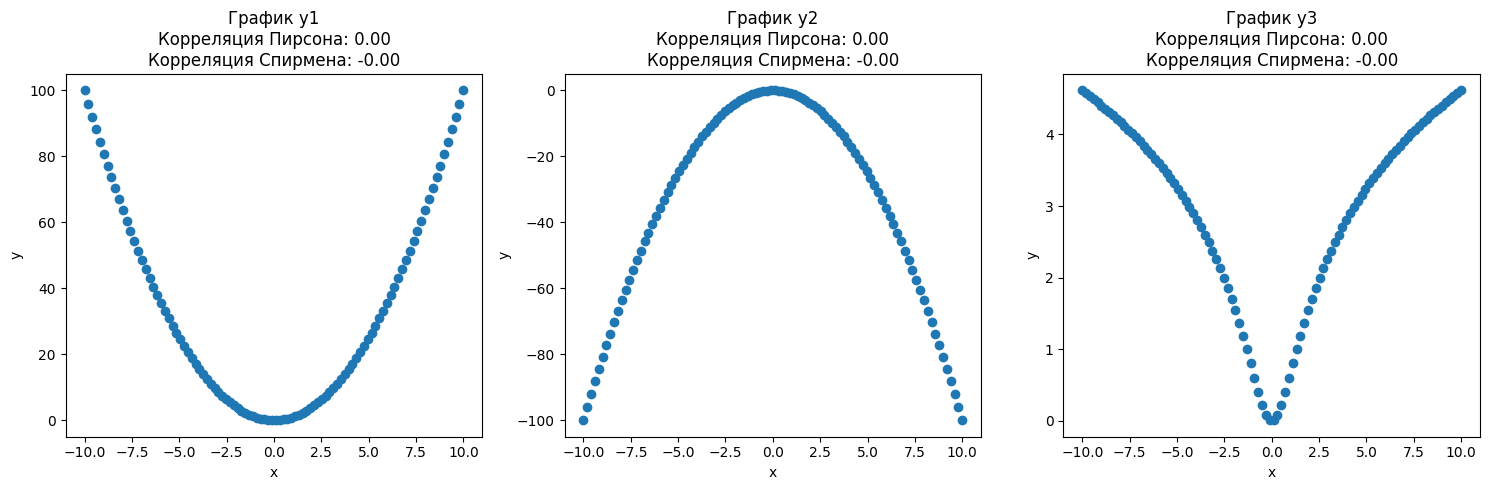

In [36]:
# Создание фигуры и осей с подходящим макетом
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# График для выборки x-y1
axs[0].scatter(x, y1, label='y1')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title(f"График y1\nКорреляция Пирсона: {corr_pearson:.2f}\nКорреляция Спирмена: {corr_spearman:.2f}")

# График для выборки x-y2
axs[1].scatter(x, y2, label='y2')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title(f"График y2\nКорреляция Пирсона: {corr_pearson:.2f}\nКорреляция Спирмена: {corr_spearman:.2f}")

# График для выборки x-y3
axs[2].scatter(x, y3, label='y3')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title(f"График y3\nКорреляция Пирсона: {corr_pearson:.2f}\nКорреляция Спирмена: {corr_spearman:.2f}") 

# Отображение графиков
plt.tight_layout()
plt.show()

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.

In [37]:
# Создается массив step, содержащий значения от -10 до 0 с равными промежутками.
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

Коэффициент корреляции Пирсона: -0.9953808388304562
Коэффициент корреляции Спирмена: -0.9954381114381115
Коэффициент корреляции Пирсона после перемещения: 0.5816494040264834
Коэффициент корреляции Спирмена после перемещения: -0.9715882435882437


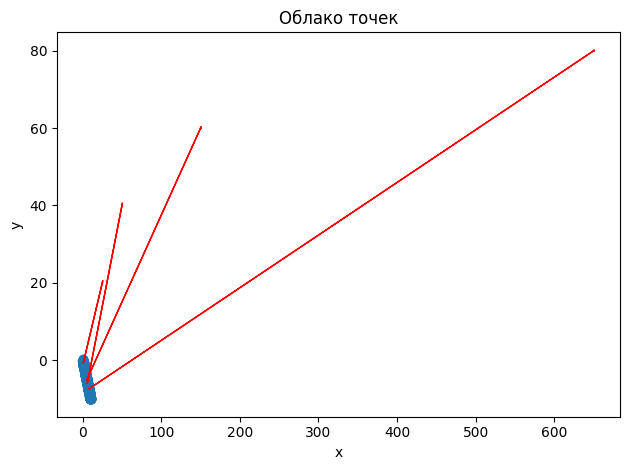

In [38]:
# Рассчитываются коэффициенты корреляции Пирсона 
corr_pearson, _ = pearsonr(x, y)
# Рассчитываются коэффициенты корреляции Спирмена
corr_spearman, _ = spearmanr(x, y)
print("Коэффициент корреляции Пирсона:", corr_pearson)
print("Коэффициент корреляции Спирмена:", corr_spearman)

# Создание графика с облаком точек
plt.scatter(x, y, alpha=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Облако точек')

# Случайный выбор четырех точек для перемещения
# random_indices - случайно выбирается четыре индекса из массива x с использованием функции np.random.choice. 
# len(x) указывает на количество элементов в массиве x 
# size=4 означает, что нужно выбрать четыре уникальных значения. 
# Параметр replace=False указывает, что выбранные значения не должны повторяться.

random_indices = np.random.choice(len(x), size=4, replace=False)
x_outliers = [25, 50, 150, 650]
y_outliers = [20, 40, 60, 80]

# В цикле for происходит итерация по парам индексов index и outlier_index, сгенерированных с помощью enumerate(random_indices). 
# index соответствует индексу новых значений в списках x_outliers и y_outliers, 
# а outlier_index - индексу точек в массивах x и y, которые будут перемещены.
for index, outlier_index in enumerate(random_indices):
    # выполняется перемещение выбранных точек путем присвоения новых значений. 
    # x[outlier_index] = x_outliers[index] и y[outlier_index] = y_outliers[index] 
    # переназначают значения x и y для выбранной точки.
    x[outlier_index] = x_outliers[index]
    y[outlier_index] = y_outliers[index]
    # строятся стрелки, указывающие на новое положение перемещенных точек. 
    # Аргументы функции определяют начальные и конечные координаты стрелки. 
    # x[outlier_index - 1] и y[outlier_index - 1] представляют предыдущие координаты точки, 
    # а x[outlier_index] и y[outlier_index] - новые координаты точки. head_width, head_length, 
    # fc и ec определяют внешний вид стрелки (ширина головы, длина головы, цвет заливки и цвет контура соответственно). 
    # В данном случае, стрелки отображаются красным цветом.
    plt.arrow(x[outlier_index - 1], y[outlier_index - 1], x[outlier_index] - x[outlier_index - 1],
              y[outlier_index] - y[outlier_index - 1], head_width=0.5, head_length=1, fc='red', ec='red')

# Повторное вычисление коэффициентов корреляции после перемещения точек
corr_pearson, _ = pearsonr(x, y)
corr_spearman, _ = spearmanr(x, y)
print("Коэффициент корреляции Пирсона после перемещения:", corr_pearson)
print("Коэффициент корреляции Спирмена после перемещения:", corr_spearman)

# Отображение графика
plt.tight_layout()
plt.show()